In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline

In [2]:
df_data = pd.read_csv("data/Social_Network_Ads.csv")
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df_data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Spliting data

In [4]:
from sklearn.model_selection import train_test_split

x=df_data.drop(columns="Purchased")
y=df_data["Purchased"]

x_train,x_test, y_train, y_test = train_test_split(x,y,random_state=2,test_size=0.3)


Scaling data // preprocessing to improve speed of the dataset.

In [5]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

X_transform_train = ss.fit_transform(x_train)
X_transform_test = ss.transform(x_test)

Shows the transformed data

In [6]:
X_transform_test[:5]

array([[-0.84529656,  0.38842245],
       [-1.6168794 , -1.59816564],
       [-0.07371372, -0.50109461],
       [-0.84529656,  0.1512179 ],
       [ 1.56589982,  0.00296506]])

Creating a decision tree classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
dc_tree=DecisionTreeClassifier(random_state=2,max_depth=7)
dc_tree.fit(X_transform_train, y_train)

y_predict=dc_tree.predict(X_transform_test);

In [8]:
y_predict[:5]

array([0, 0, 0, 0, 1], dtype=int64)

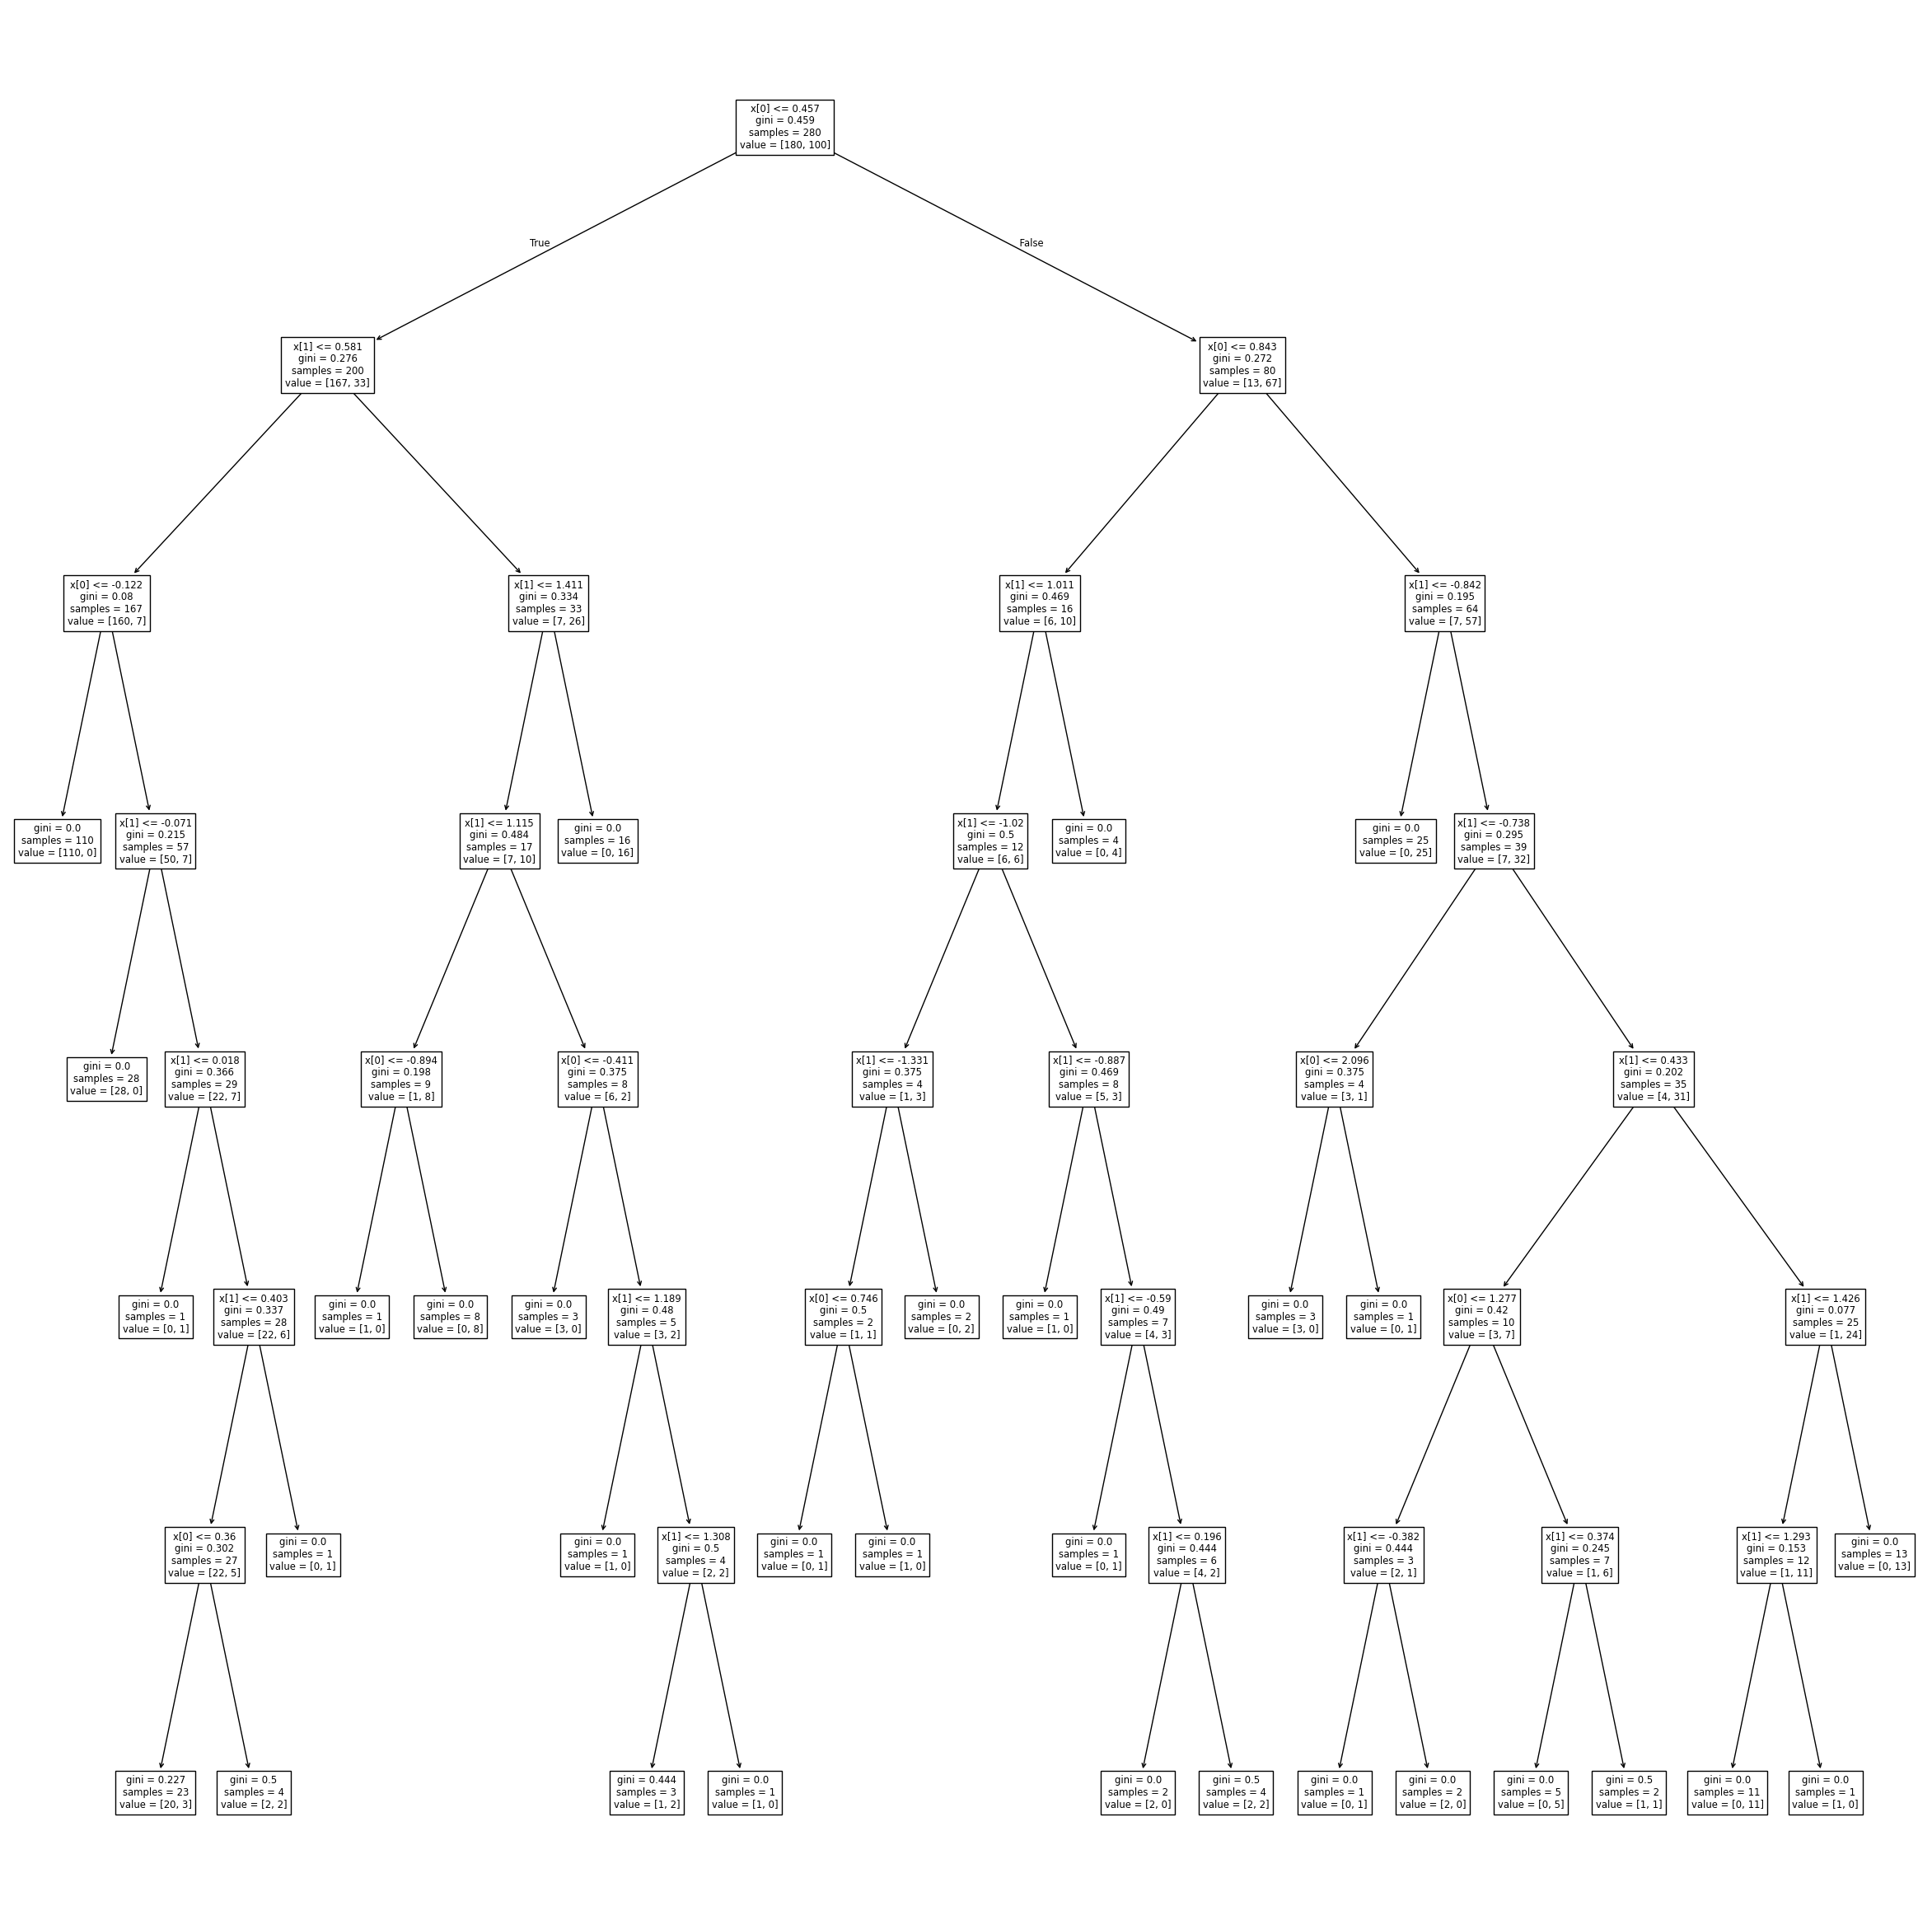

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(dc_tree)
plt.show()

In [10]:
from sklearn.metrics import f1_score,accuracy_score

In [11]:
print(f"F1 score: {f1_score(y_test,y_predict):.2f}")

F1 score: 0.86


In [12]:
print(f"Accuracy: {accuracy_score(y_test,y_predict):.2f}")

Accuracy: 0.90
